In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "anime-survey"

# Analysis of Anime Habits and Preferences Among Tunisians

This survey, conducted among Tunisians, aims to understand their preferences and habits regarding anime. Through a series of questions, it explores the landscape of anime consumption in Tunisia, providing valuable insight into the country's popular culture.

In [2]:
# Load necessary libraries
library(readxl)
library(lessR)
library(FactoMineR)
library(factoextra)
library(corrplot)



lessR 4.3.6                         feedback: gerbing@pdx.edu 
--------------------------------------------------------------
> d <- Read("")   Read text, Excel, SPSS, SAS, or R data file
  d is default data frame, data= in analysis routines optional

Many examples of reading, writing, and manipulating data, 
graphics, testing means and proportions, regression, factor analysis,
customization, and descriptive statistics from pivot tables
  Go to:  https://web.pdx.edu/~gerbing/lessR/examples

View changes in this and recent versions of lessR
  Enter: news(package="lessR")

Interactive data analysis
  Enter: interact()





Attaching package: ‘lessR’




The following objects are masked from ‘package:dplyr’:

    recode, rename




The following object is masked from ‘package:base’:

    sort_by




Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa



corrplot 0.92 loaded



In [3]:
# Import the dataset
anime_survey_1_ <- read_excel("/kaggle/input/anime-survey/anime_survey (1) (1).xlsx")
 row_to_delete <- 1
 anime_survey_1_ <- anime_survey_1_[-row_to_delete, ]
 column_to_delete <- "9"
 anime_survey_1_ <- anime_survey_1_[, !colnames(anime_survey_1_) %in% column_to_delete]
 column_to_delete <- "...9"
 anime_survey_1_ <- anime_survey_1_[, !colnames(anime_survey_1_) %in% column_to_delete]

New names:
• `` -> `...9`


## Descriptive Statistics

In [4]:
 library(lessR)

In [5]:
library(FactoMineR)
 library(factoextra)

In [6]:
library(factoextra)

## 1- DISTRIBUTION BY GENDER

In [7]:
# Gender distribution (Pie chart)
Homme = sum(anime_survey_1_$sexe == "1")
Femme = sum(anime_survey_1_$sexe == "0")
n = c(Homme, Femme)
Sexe = as.factor(c("Homme", "Femme"))
gender = as.data.frame(cbind(Sexe, n))

PieChart(x = Sexe, y = n, gender, fill = c("#89b0ae", "#ffd6ba"), values_color = "Black", hole = 0, main = "Répartition par genre")

>>> Parameters  values, values_color, etc. now renamed to:  labels, labels_color, etc.
    Old parameter names will stop working in the future.




>>> Note: Sexe is not in a data frame (table)
>>> Note: Sexe is not in a data frame (table)
>>> Note: n is not in a data frame (table)


>>> suggestions
PieChart(Sexe, hole=0)  # traditional pie chart
PieChart(Sexe, labels="%")  # display %'s on the chart
PieChart(Sexe)  # bar chart
Plot(Sexe)  # bubble plot
Plot(Sexe, labels="count")  # lollipop plot 

--- Sexe --- 

               Homme  Femme    Total 
Frequencies:      28     21       49 
Proportions:   0.571  0.429    1.000 

Chi-squared test of null hypothesis of equal probabilities 
  Chisq = 1.000, df = 1, p-value = 0.317 




INTERPRETATION: According to the survey results, it appears that men are slightly more represented than women. However, to draw more precise conclusions, it would be necessary to examine the responses and behaviors in more detail.

## 2- DISTRIBUTION BY EMPLOYMENT

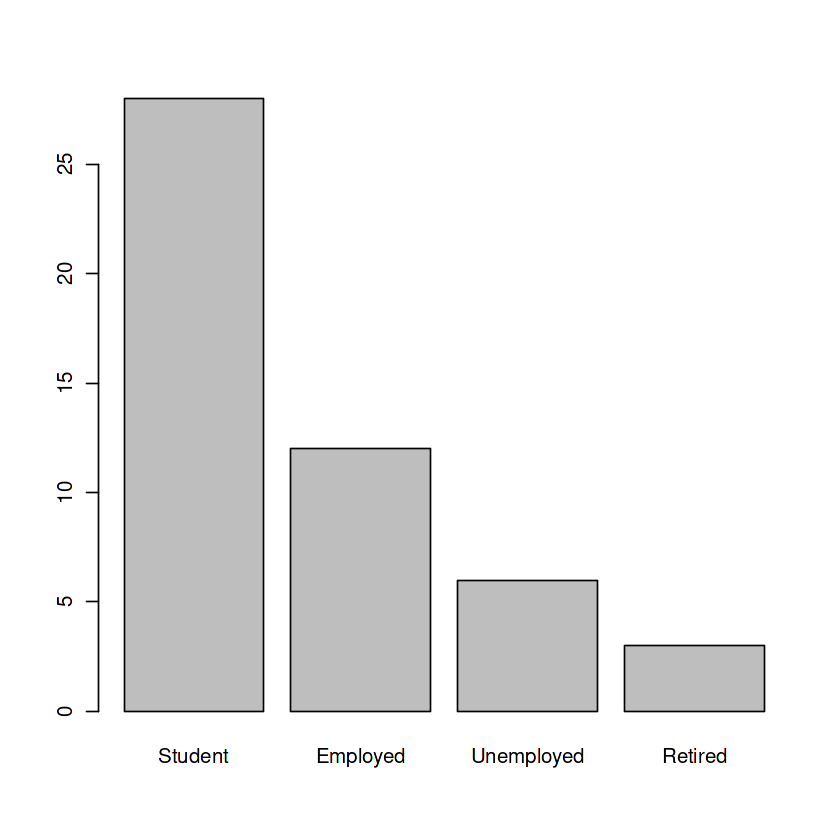

In [8]:
student=sum(anime_survey_1_$employment== "1")
employed=sum(anime_survey_1_$employment== "2")
unemployed=sum(anime_survey_1_$employment== "3")
retired=sum(anime_survey_1_$employment== "4")
barplot(c(student, employed, unemployed, retired),names.arg = c("Student", "Employed", "Unemployed", "Retired"))

CONCLUSION: These results show that most of the people surveyed are students, followed by employees, while the unemployed and retirees represent a minority.

## 3-Watching Anime:

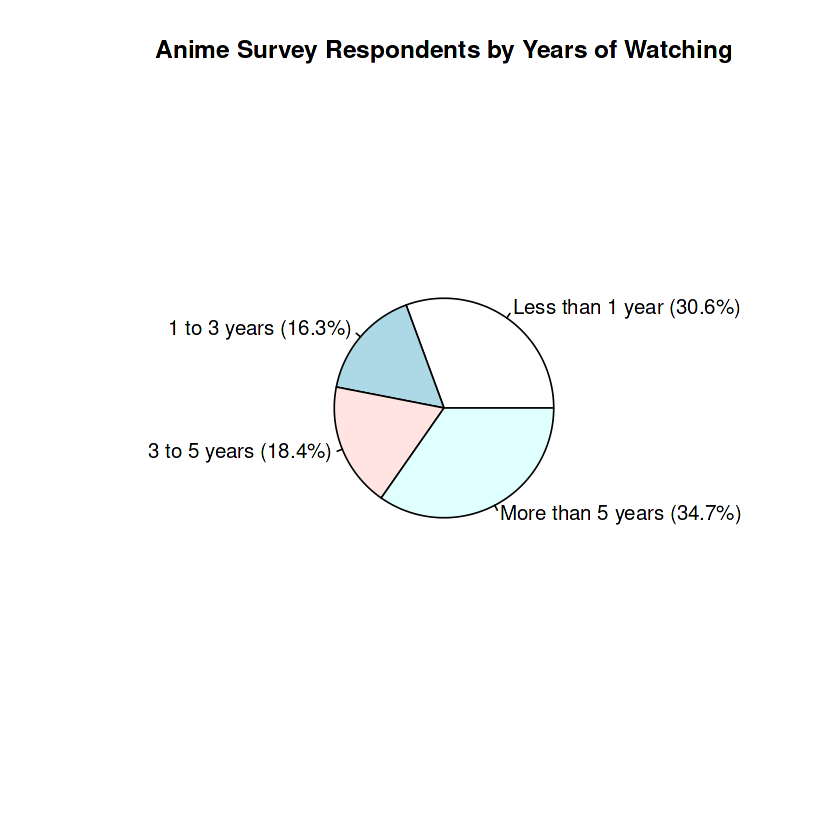

In [9]:
Less_than_1_year=sum(anime_survey_1_$longeur== "1")
one_to_3years=sum(anime_survey_1_$longeur== "2")
three_to_5years=sum(anime_survey_1_$longeur== "3")
More_than_5_years=sum(anime_survey_1_$longeur== "4")
counts <- c(Less_than_1_year, one_to_3years, three_to_5years, More_than_5_years)
labels <- c("Less than 1 year", "1 to 3 years", "3 to 5 years", "More than 5 years")
total <- sum(counts)
percentages <- round(100 * counts / total, 1)
pie(counts, labels = paste0(labels, " (", percentages, "%)"), main = "Anime Survey Respondents by Years of Watching")

INTERPRETATION: According to the survey results, a significant portion of respondents (34.7%) have been watching anime for more than 5 years, while 18.4% have 3 to 5 years of experience. A large proportion (30.6%) have discovered anime in the past year, while 16.3% have between 1 and 3 years of experience. This suggests a dynamic mix of newcomers and long-time fans within the anime community.

## Principal Component Analysis (PCA):

PCA (Principal Component Analysis) is a statistical method used to explore and summarize the structure of multidimensional data. Its goal is to reduce and simplify the data.

1- Correlation Matrix:

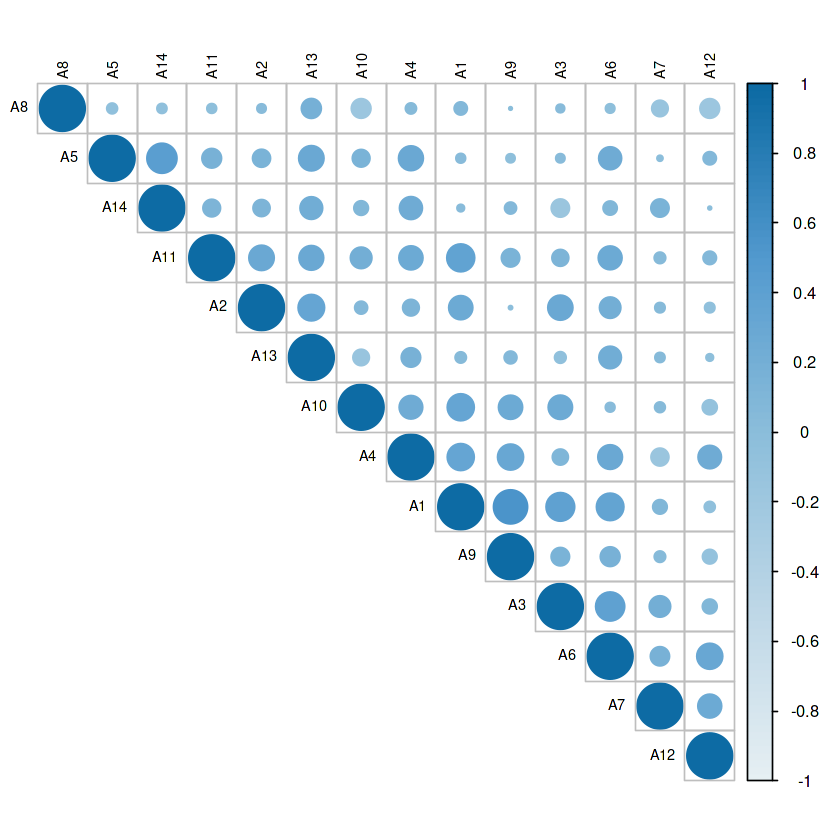

In [10]:
# Correlation Matrix
X = as.matrix(anime_survey_1_[, c(16:29)]) 
M <- cor(X) 
corrplot(M, type = "upper", order = "hclust", col = colorRampPalette(c("#E6F0F3", "#BDD7E7", "#8CBEDB", "#539ACF", "#0D6BA4"))(100), tl.col = "black", tl.cex = 0.7)

LEGEND:

A1: Character development
A2: Quality of animation
A3: Depth and complexity of the storyline
A4: Originality and creativity of the anime
A5: Quality of the soundtrack
A6: Pacing and flow of episodes
A7: Presence of strong thematic elements
A8: Voice acting performances
A9: Conclusion of a storyline
A10: Art style and visual aesthetic
A11: Emotional depth and impact
A12: Popularity or reputation
A13: Presence of memorable quotes
A14: Exploration of moral themes
INTERPRETATION: The correlation matrix suggests that the variables A1 (Character development), A11 (Emotional depth and impact), A5 (Quality of the soundtrack), A3 (Depth and complexity of the storyline), A9 (Conclusion of a storyline), A10 (Art style and visual aesthetic), and A13 (Presence of memorable quotes) are closely related.

 2-choix du nombre d’axe:

In [11]:
 library(FactoMineR)
 library(factoextra)
 res.pca=PCA(X,graph= T)

In [12]:
head(res.pca$eig)

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,3.0296978,21.640698,21.64070
comp 2,1.7559185,12.542275,34.18297
comp 3,1.5304977,10.932126,45.11510
comp 4,1.3442410,9.601721,54.71682
comp 5,1.1220972,8.014980,62.73180
comp 6,0.9906084,7.075774,69.80757


INTERPRETATION:
The first three principal components explain about 45% of the variance in the data processed in this survey, while the remaining components explain approximately 55% of the variance.

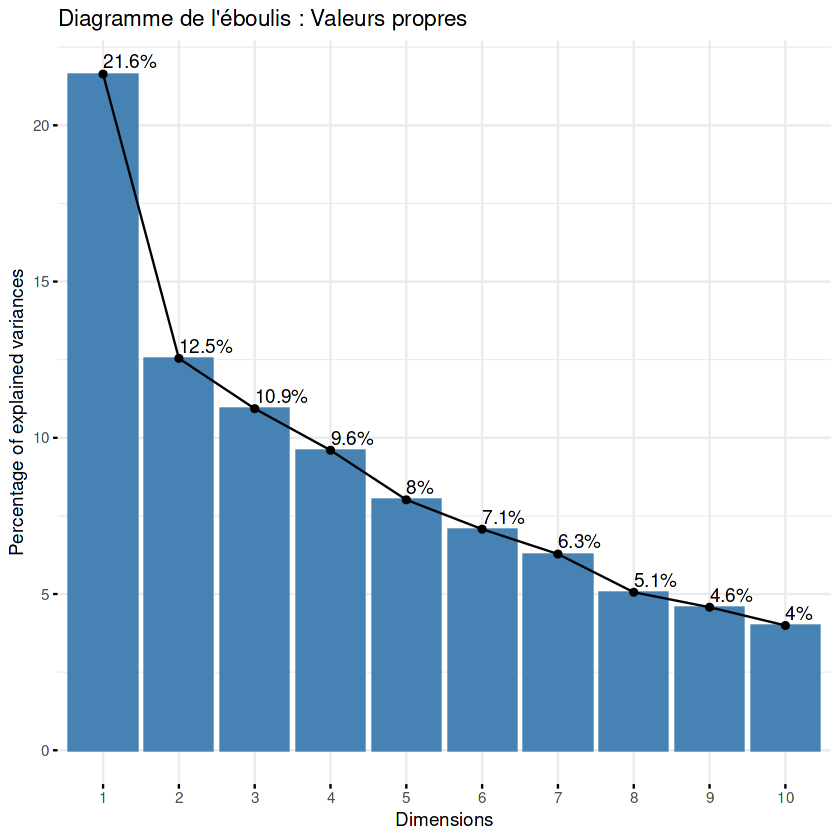

In [13]:
 library(ggplot2)
 library(factoextra)
 fviz_eig(res.pca, addlabels = TRUE) + ggtitle("Diagramme de l'éboulis : Valeurs propres")

INTERPRETATION:

1-Kaiser Criterion: This criterion suggests retaining the components with eigenvalues greater than 1 to determine the number of components to keep.

2-Cumulative Inertia Criterion: This involves selecting the principal components that accumulate a high percentage of the total variance, typically set at 70% or more, to ensure adequate data representation while reducing dimensionality.

3-Elbow Criterion: By observing the inertia explained graph against the number of components, we can identify the point where adding new components no longer significantly contributes to the variance in the data.

=> Based on these criteria, we can retain the first two principal components, which explain approximately 34.1% of the total inertia.









 Interpretation de la carte des variables :

In [14]:
 res.pca$var$coord

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
A1,0.70590354,-0.43058591,-0.21229939,0.06223284,0.03370204
A2,0.48006878,0.16513067,-0.08916624,0.44531550,-0.40072952
A3,0.49403820,-0.44786027,0.24689325,0.32771807,-0.13910245
A4,0.61022920,0.10964767,-0.12905693,-0.29972065,0.50228590
A5,0.41996731,0.57032762,0.00924729,-0.27056305,-0.07322457
A6,0.63210573,0.03491885,0.36260448,0.23023103,0.23847622
A7,0.19663445,-0.06297209,0.59102601,0.08344902,-0.36040412
A8,-0.01281034,0.08585953,-0.45398179,0.51794354,0.31926975
A9,0.49139873,-0.40457553,-0.30057384,-0.20279444,0.18677934
A10,0.43614588,-0.37134119,-0.13837756,-0.47716712,-0.31866570


squared cosine of the variables on the PCA axes

In [15]:
 res.pca$var$cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
A1,0.4982998043,0.185404224,0.04507103280,0.003872927,0.0011358273
A2,0.2304660323,0.027268138,0.00795061840,0.198305898,0.1605841486
A3,0.2440737455,0.200578823,0.06095627842,0.107399132,0.0193494908
A4,0.3723796823,0.012022612,0.01665569161,0.089832465,0.2522911208
A5,0.1763725402,0.325273590,0.00008551236,0.073204362,0.0053618372
A6,0.3995576593,0.001219326,0.13148200939,0.053006328,0.0568709099
A7,0.0386651080,0.003965484,0.34931174859,0.006963739,0.1298911301
A8,0.0001641049,0.007371859,0.20609946842,0.268265509,0.1019331720
A9,0.2414727080,0.163681363,0.09034463315,0.041125586,0.0348865232
A10,0.1902232243,0.137894277,0.01914834914,0.227688459,0.1015478313


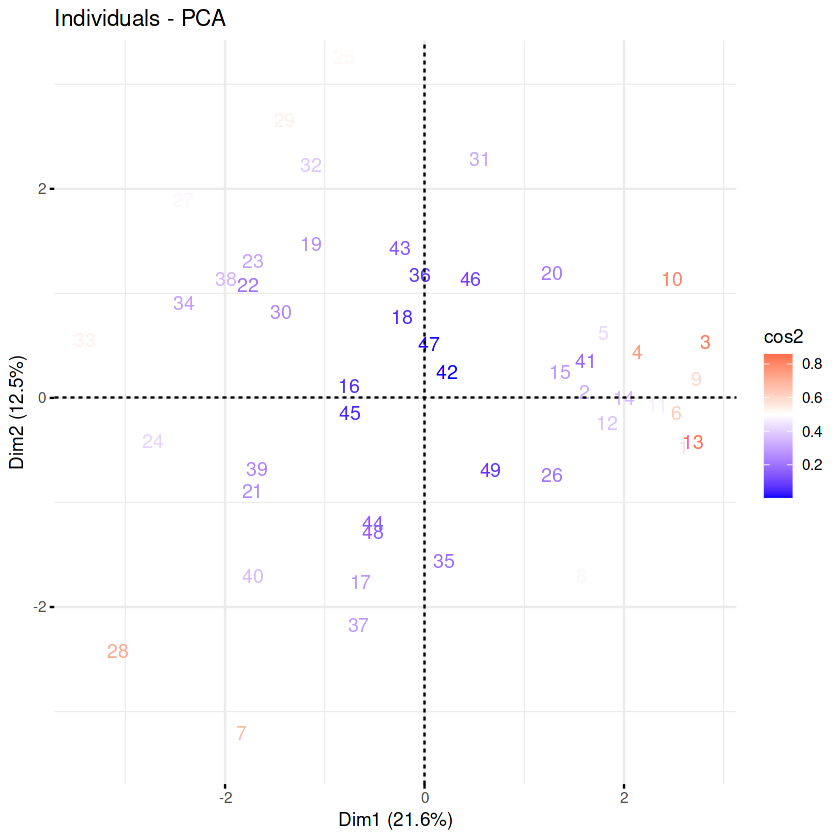

In [16]:
 fviz_pca_ind(res.pca,geom = "text",col.ind="cos2")+
 scale_color_gradient2(low="blue", mid="white",high="red", midpoint=0.5)

## MCA

In [17]:
library(FactoMineR)
 library(factoextra)
 l.anime<-anime_survey_1_[,8:15]
 print(l.anime)

# A tibble: 49 × 8
   B1    B2    B3    B4    B5    B6    B7    B8   
   <chr> <chr> <chr> <chr> <chr> <chr> <chr> <chr>
 1 no    no    yes   no    no    no    no    no   
 2 yes   yes   yes   yes   yes   no    yes   yes  
 3 yes   yes   no    yes   no    no    yes   yes  
 4 no    yes   yes   yes   yes   yes   yes   yes  
 5 yes   yes   yes   yes   no    yes   no    yes  
 6 yes   yes   yes   yes   no    no    yes   yes  
 7 yes   no    yes   yes   no    no    no    no   
 8 yes   no    yes   yes   no    yes   yes   no   
 9 yes   yes   yes   yes   no    yes   yes   yes  
10 yes   no    yes   no    no    no    no    yes  
# ℹ 39 more rows


In [18]:
 res.mca <- MCA (l.anime, graph = FALSE)

Legend:

B1: Anime in its original Japanese language with subtitles

B2: Rewatch your anime

B3: Exploring anime from different time periods, such as classic or retro anime

B4: Recommendations for new anime to watch

B5: Collect anime merchandise or memorabilia

B6: Participating in anime-related activities, such as cosplay or fan art contests

B7: Explores complex philosophical or existential themes

B8: Exploring anime from different cultures, such as Korean or Chinese animation

1-VISUALISATION:

In [19]:
 res.mca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
dim 1,0.21928904,21.928904,21.92890
dim 2,0.18606726,18.606726,40.53563
dim 3,0.16519169,16.519169,57.05480
dim 4,0.12159955,12.159955,69.21475
dim 5,0.09931628,9.931628,79.14638
dim 6,0.08845695,8.845695,87.99208
dim 7,0.07292385,7.292385,95.28446
dim 8,0.04715538,4.715538,100.00000


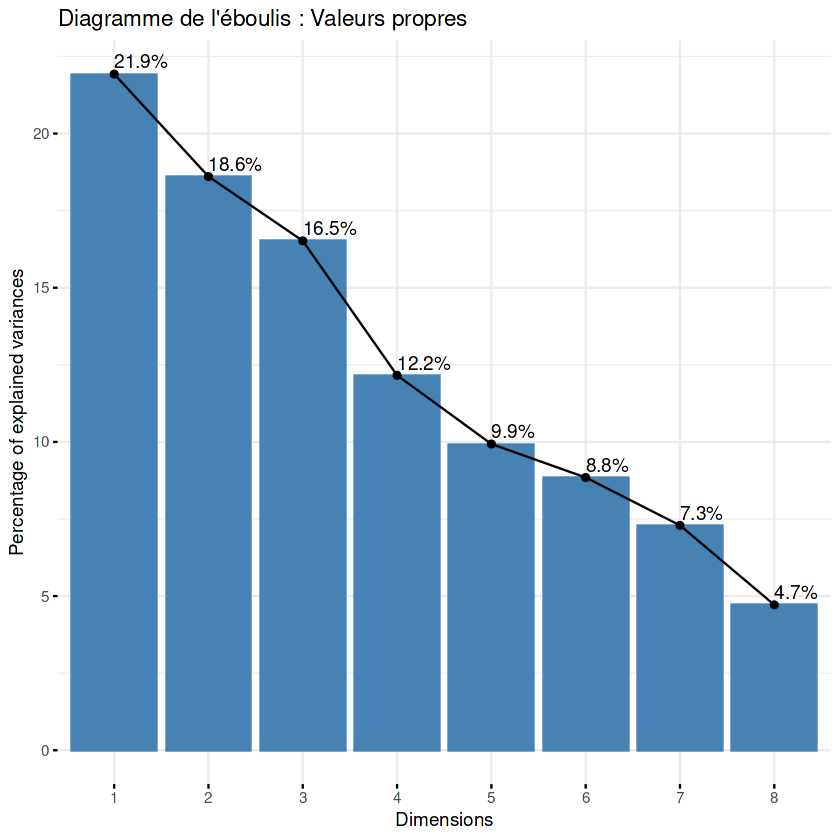

In [20]:
 fviz_eig(res.mca, addlabels = TRUE) +ggtitle("Diagramme de l'éboulis : Valeurs propres")

Interpretation:
The Multiple Correspondence Analysis (MCA) conducted on the anime data yielded the following results:

1-The first three dimensions meet the criteria and are the most important in explaining the data.

2-The cumulative inertia criterion for the first three dimensions accounts for 57% of the variance, which indicates that these three dimensions are crucial for explaining the data.

3-Elbow Criterion: It is observed that the elbow occurs after the fourth principal component. Therefore, we can limit ourselves to retaining the first four principal components.

## Representation of the First Modalities Map:

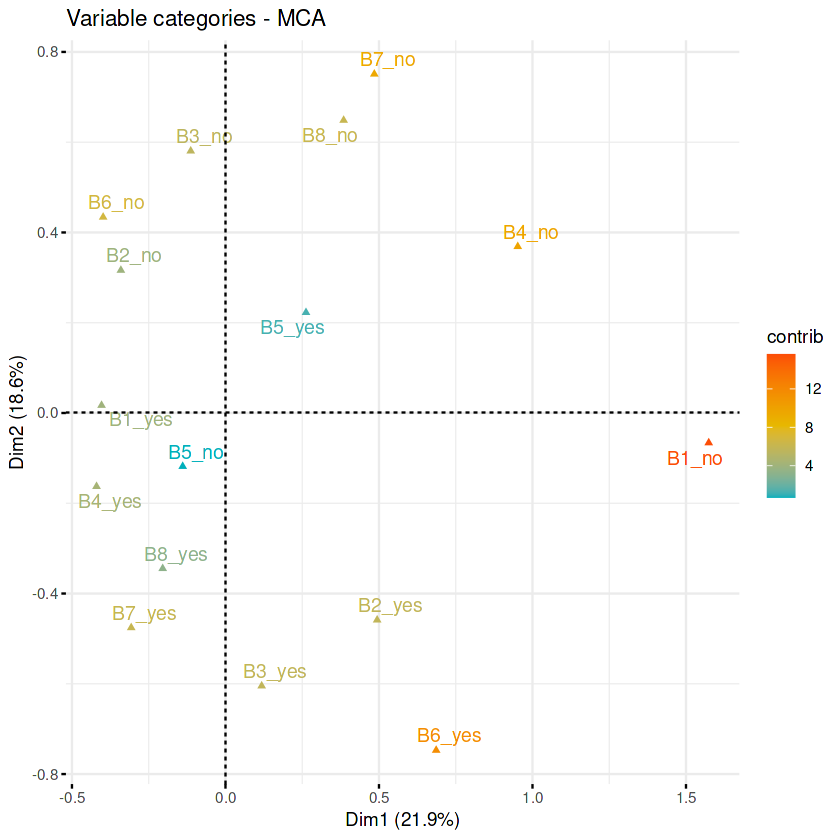

In [21]:
 fviz_mca_var(res.mca,
 col.var = "contrib", # Couleur en fonction de la contribution
 gradient.cols = c("#00AFBB", "#E7B800", "#FC4E07"), # Choix de couleurs
 repel = TRUE, # Évite le chevauchement des labels
 ggtheme = theme_minimal() # Style du graphique
 )

In [22]:
 dimdesc(res.mca, axes=1:2, proba=0.05)$`Dim 1`

,R2,p.value
B1,0.6352875,0.000000000007294278
B4,0.3998322,0.000001095477801559
B6,0.2734603,0.000115786734065734
B2,0.1683106,0.003414308121748792
B7,0.1488384,0.006186575402488908
,Estimate,p.value
B1=B1_no,0.4630495,0.000000000007294278
B4=B4_no,0.3212391,0.000001095477801559
B6=B6_yes,0.2539830,0.000115786734065735
B2=B2_yes,0.1954413,0.003414308121748798


The first axis in this Multiple Correspondence Analysis (MCA) seems to represent individuals who watch anime with subtitles.

In [23]:
 dimdesc(res.mca, axes=1:2, proba=0.05)$`Dim 2`

,R2,p.value
B7,0.3571524,0.000005793571
B3,0.3510584,0.000007287982
B6,0.3242772,0.000019534393
B8,0.2235062,0.000603130815
B2,0.1450617,0.006937035835
,Estimate,p.value
B7=B7_no,0.2645394,0.000005793571
B3=B3_no,0.2556319,0.000007287982
B6=B6_no,0.2547664,0.000019534393
B8=B8_no,0.2142133,0.000603130815


The second axis in this Multiple Correspondence Analysis (MCA) seems to represent an axis related to philosophical and existential themes in anime.

##  CLASSIFICATION:

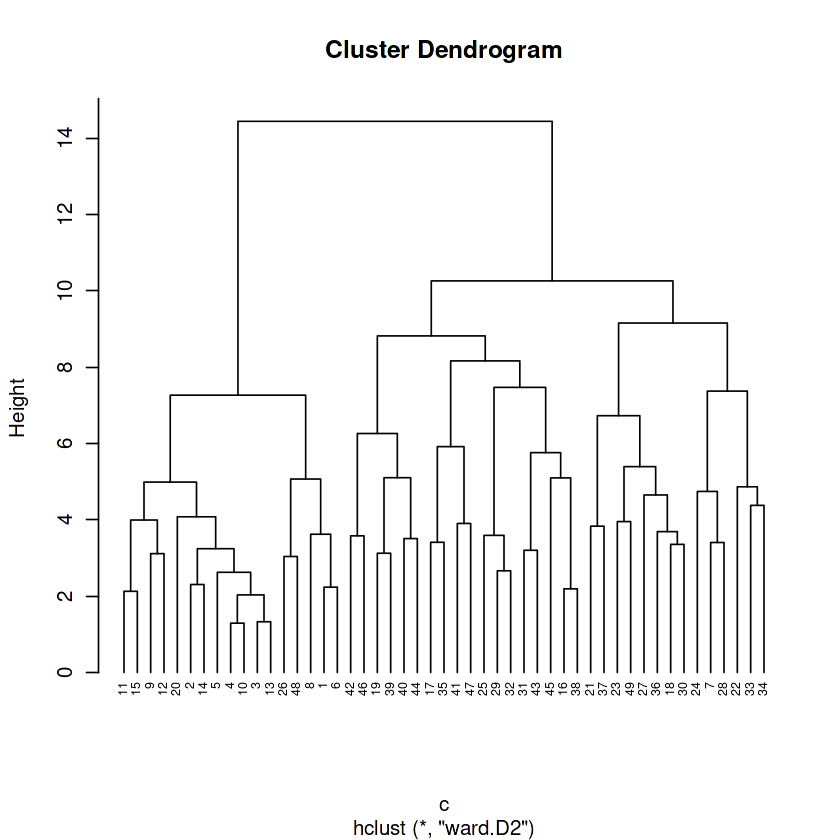

In [24]:
new<-anime_survey_1_[16:29]
 c<-dist(scale(new),method="euclidean")
 h<- hclust(c, method="ward.D2")
 plot(h, hang =-1, cex =0.6)

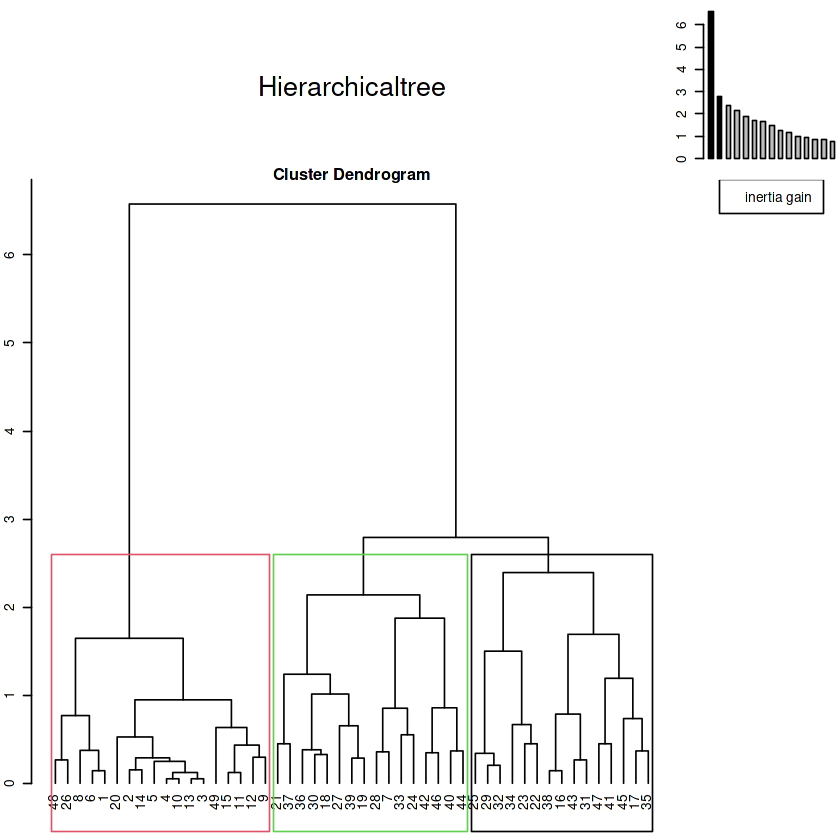

In [25]:
 library(FactoMineR)
 res.HCPC<-HCPC(new,consol=TRUE,graph=F)
 plot.HCPC(res.HCPC,choice='tree',title='Hierarchicaltree')

We can choose 3 axes.

## HIERARCHICAL TREE:

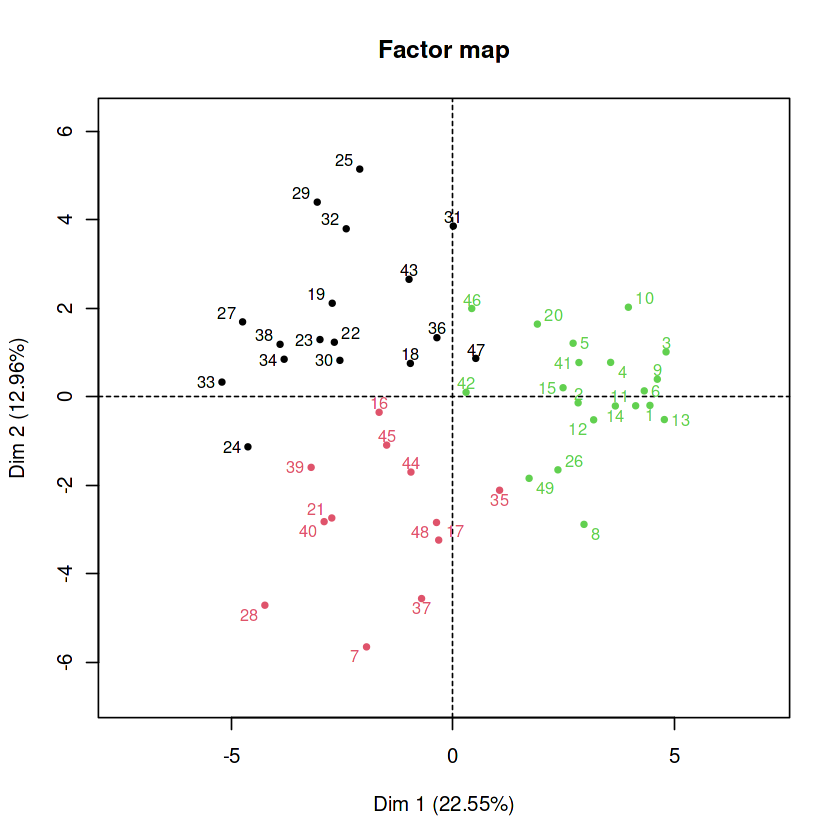

In [26]:
plot.HCPC(res.HCPC, choice = 'map', draw.tree=FALSE, title ='Factor map')

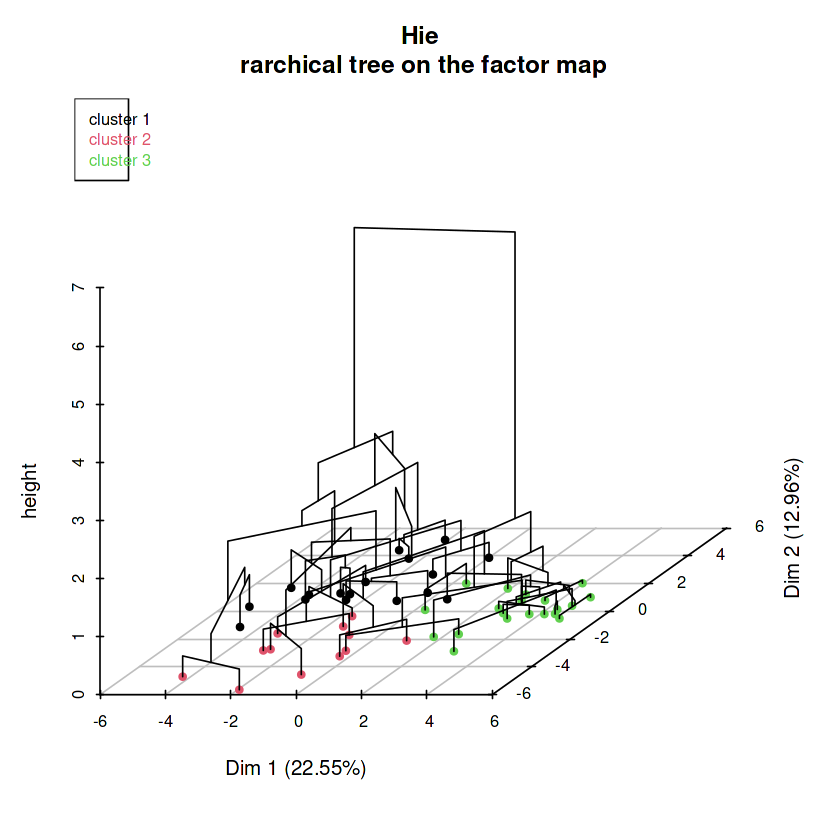

In [27]:
 plot.HCPC(res.HCPC,choice = '3D.map', ind.names=FALSE, centres.plot=FALSE, angles=60,title='Hie
 rarchical tree on the factor map')

Description of the classes by the variables:

In [28]:
 res.HCPC$desc.var

,Eta2,P-value
A1,0.6077596,0.0000000004484396
A14,0.5346308,0.0000000228741473
A5,0.4311841,0.0000023139288387
A3,0.3541355,0.0000429786000760
A9,0.2793184,0.0005346856486200
A10,0.2723713,0.0006666924744418
A13,0.2625316,0.0009080258621161
A6,0.2597246,0.0009909374102187
A11,0.2289562,0.0025282419106920
A4,0.1618299,0.0172440900561087


=> Cluster 1 favors the emotional aspect and the moral side of the anime, as well as character development.

=> Cluster 2 favors creativity and originality in the anime, especially the musical aspect and soundtracks.

=> Cluster 3 favors the complexity of the storyline and the quality of the animation, as well as the pacing and flow of the episodes.

In [29]:
 res.HCPC$desc.axes

Link between the cluster variable and the quantitative variables
================================================================
           Eta2                 P-value
Dim.1 0.7618925 0.000000000000004632109
Dim.2 0.6022085 0.000000000619549397095

Description of each cluster by quantitative variables
=====================================================
$`1`
         v.test Mean in category              Overall mean sd in category
Dim.2  4.107854         1.836046  0.0000000000000004256799       1.584224
Dim.1 -4.249635        -2.505855 -0.0000000000000004073414       1.646599
      Overall sd       p.value
Dim.2   2.257037 0.00003993531
Dim.1   2.977655 0.00002141187

$`2`
         v.test Mean in category              Overall mean sd in category
Dim.1 -2.150360        -1.622838 -0.0000000000000004073414       1.417547
Dim.2 -4.860833        -2.780603  0.0000000000000004256799       1.502456
      Overall sd        p.value
Dim.1   2.977655 0.031526756758
Dim.2   2.257037 0.000001168927

$`3`
       v.test Mean in category              Overall mean sd in category
Dim.1 5.99707          3.10368 -0.0000000000000004073414       1.289221
      Overall sd           p.value
Dim.1   2.977655 0.000000002009093

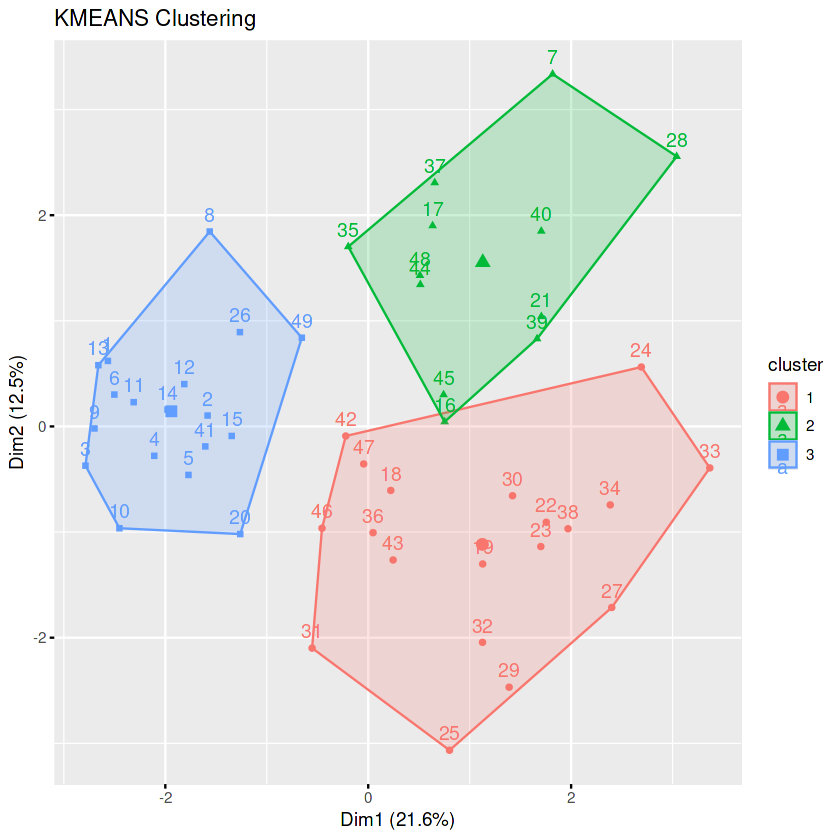

In [30]:
 res.km <- eclust(anime_survey_1_[16:29], "kmeans", nstart = 25,k=3)